In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import plot_partial_dependence
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [5]:
cols_to_use=['Call Spread','CBLO Spread','Market Repo Spread','P/E Ratio', 'NSE Return','SMC to GDP Ratio (Buffet Indicator)','Forex CMAX','Implied Volatility','Exchange Rates']
def get_some_data():
    data = pd.read_csv('../input/plots-dataset/ICE PCE Data.csv')
    y = data.Index
    X = data[cols_to_use]
    my_imputer = SimpleImputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y

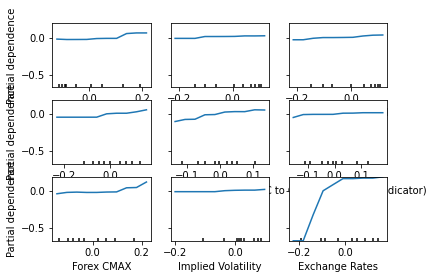

In [7]:
X, y = get_some_data()
my_model = GradientBoostingRegressor()
my_model.fit(X, y)
my_plots = plot_partial_dependence(my_model, 
                                   features=[0,1,2,3,4,5,6,7,8], 
                                   X=X, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=10)

In [53]:
from sklearn.metrics import mean_squared_error


In [54]:
prediction=my_model.predict(X)

In [55]:
mean_squared_error(prediction,y)

0.008492138089638264